## CS164 ASSIGNMENT 2: CONSTRAINED OPTIMIZATION & THE KKT CONDITIONS

#### Vinícius Miranda

The assignment instructions are available [here](https://course-resources.minerva.kgi.edu/uploaded_files/mke/00087691-7466/assignment2.pdf).

We are concerned with the linear program

$$
\begin{equation*}
\begin{aligned}
& \underset{x}{\text{min}}
& & c^Tx \\
& \text{subject to:} 
& & Ax \leq b
\end{aligned}
\end{equation*}
$$

where $A \in \mathbb{R}^{m\times n}, b \in \mathbb{R}^{m\times 1}$ and $c\in \mathbb{R}^{n\times 1}$. Its KKT conditions are

$$
\begin{align}
\text{Primal Feasibility : } &A\textbf{x}^* \preceq b \\
\text{Dual Feasibility : } &\begin{cases} c + A^T\lambda = \textbf{0} \\ 
                            \lambda \succeq \textbf{0} \end{cases}  \\
\text{Complementary Slackness : } &\lambda^T(A\textbf{x}^*-b) = \textbf{0}
\end{align}
$$

where dual feasilibity is also known as the stationary condition and $\lambda \in \mathbb{R}^{m\times 1}$. Note that $\preceq$ and $\succeq$ are component-wise (vectorized) versions of $\leq$ and $\geq$. There are three possibilities for the solution of this LP (Calafiore XXXX). They are
1. If the intersection among the half-spaces defined by each of the $m$ constraints is empty, then the feasible set is the empty set and there is no solution.
2. If the feasible set is nonempty and unbounded, then the problem may or may not attain a finite solution. The geometric interpretation is that if one direction of descent of the objective function is unbounded in the feasible set, the minimum is never found as the function decreases infinitely. 
3. If the feasible set is nonempty and bounded, the feasible is a polyhedron (or polytope) and the solution is attained at one of its vertices. The proof below follows from Calafiore (XXXX). 

Let $\mathcal{X} = \{x\in\mathbb{R}^n : Ax\leq b\}$. A point $x^*$ is a solution if and only if $c^Tx\geq c^Tx^*, \forall x \in \mathcal{X}$. In other words, if all other points in the feasible set have higher objectives. Similarly, we may say that if $x^*$ is optimal, then $c^T(x-x^*)\geq0, \forall x \in \mathcal{X}$, which is to say that all directions in the feasible set are non-descent directions. Notice that for $f(x)=c^Tx, \nabla f=c$. If $x^*$ were not a boundary point of the feasible set,  one would need only step in the direction $-c$ to reduce the objective. Furthermore, when $\exists x \in \mathcal{X}$ such that $x \neq x^*$ and $c^T(x-x^*)=0$, there is a collection of points that extremize the objective. These points are all in a face (or facets) of the polyhedron (or polytope), which occurs when the level curves (or sets) of the objective function are parallel to the face.



## $l_1$ and $l_\infty$ Regression



The $l_1$ and $l_\infty$ norms can be used as cost functions to find the line-of-best-fit for a regression problem. We can thus define the problems

$$\min_{\Theta}||Y-X\Theta||_1$$

and

$$\min_{\Theta}||Y-X\Theta||_{\infty}$$

where $X \in \mathbb{R}^{N\times2}$ for a dataset of $N$ points in $\mathbb{R}^2$, $Y \in \mathbb{R}^{N\times1}$, and $\Theta \in \mathbb{R}^{2\times1}$.

### $l_1$ norm

The $l_1$ norm computes the sum of the absolute values of each component of a vector. In other words, 

$$\min_{\Theta}||Y-X\Theta||_1=\min_{\Theta}\sum_{i=1}^N|Y_i-X_i\Theta|.$$

We can then introduce slack variables $u_i$ which will provide bounds to the absolute values. By minimizing over the slack variables, we will always find the tighest nonnegative bound and hence the linear program remains the same. The LP then becomes

$$
\begin{equation*}
\begin{aligned}
& \underset{\Theta, u}{\text{min}}
& & \sum_{i=1}^N u_i \\
& \text{subject to:} 
& & |Y_i-X_i\Theta| \leq u_i, i=1,\dots,N 
\end{aligned}
\end{equation*}
$$

which we can express in standard form as

$$
\begin{equation*}
\begin{aligned}
& \underset{\Theta, u}{\text{min}}
& & \textbf{1}^T\textbf{u} \\
& \text{subject to:} 
& & Y_i-X_i\Theta -u_i \leq 0, i=1,\dots,N \\
& & & X_i\Theta-Y_i- u_i \leq 0, i=1,\dots,N
\end{aligned}
\end{equation*}
$$

We thus introduce $N$ slack variables and $2\times N$ constraints.

### $l_\infty$ norm

We proceed similarly with the $l_\infty$ norm. However, we are now interested only in the largest absolute value of all the components of the vector over which we minimize. Therefore, only one slack variable is necessary to provide a bound on this value. As before, as we minimize the slack variable, we find the tighest bound possible, equivalent to the value of the infinity norm, and thus the LPs are equivalent. Therefore,

$$
\begin{equation*}
\begin{aligned}
& \underset{\Theta, t}{\text{min}}
& & t\\
& \text{subject to:} 
& & ||Y-X\Theta||_{\infty} \leq t 
\end{aligned}
\end{equation*}
$$

Since $t$ bounds the largest component of the vector, we also bounds all the other components. In other words,

$$||Y-X\Theta||_{\infty} \leq t \iff \max_{i=1,\dots,N} |Y_i-X_i\Theta|\leq t \iff |Y_i-X_i\Theta|\leq t, i = 1,\dots, N$$

In standard form, the LP then becomes

$$
\begin{equation*}
\begin{aligned}
& \underset{\Theta, t}{\text{min}}
& & t\\
& \text{subject to:} 
& & Y_i-X_i\Theta -t \leq 0, i=1,\dots,N \\
& & & X_i\Theta-Y_i- t \leq 0, i=1,\dots,N
\end{aligned}
\end{equation*}
$$

Thus, we introduce one slack variable $t$ and $2\times N$ constraints. This section is also heavily based on Calafiore (XXXX).


Some code is given below to generate a synthetic dataset.  Using CVX, solve two linear programs for computing the regression line for $l_1$ and $l_\infty$ regression. Plot the lines over the data to evaluate the fit.



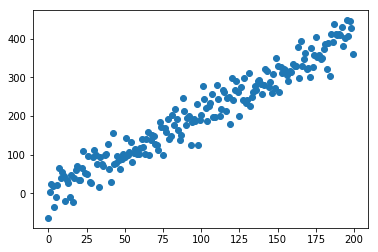

In [5]:
# l_1 and l_infinity regression using cvxpy
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

# generate a synthetic dataset

# actual parameter values
theta1_act = 2
theta2_act = 5

# Number of points in dataset
N = 200

# Noise magnitude
mag = 30

# datapoints
x = np.arange(0,N)
y = theta1_act * x + theta2_act *np.ones([1,N]) + np.random.normal(0,mag,N)

plt.figure()
# Scatter plot of data
plt.scatter(x,y)
plt.show()


### $l_1$ norm

In [2]:
# Arranging the variables and checking proper dimensionality
X = np.array([x, np.ones_like(x)]).T
Y = y.T
assert X.shape == (N, 2)
assert Y.shape == (N, 1)

# HINT: you will first want to declare a variable for the parameters of the line
theta_1 = cvx.Variable(2)

# The slack variables
u = cvx.Variable(N)

# The constraints.
constraints = [Y.flatten() - X@theta_1 - u <= np.zeros(N),
               X@theta_1 - Y.flatten() - u <= np.zeros(N)]

# Form objective.
obj = cvx.Minimize(np.ones(N).T@u)

# Form and solve problem.
prob = cvx.Problem(obj, constraints)
prob.solve("ECOS")  # Returns the optimal value.
print("status:", prob.status)
print("optimal value:", prob.value)
print("optimal Θ:", theta_1.value)

status: optimal
optimal value: 5034.734558966026
optimal Θ: [1.97202379 9.75376663]


### $l_\infty$ norm

In [3]:
# HINT: you will first want to declare a variable for the parameters of the line
theta_infty = cvx.Variable(2)

# The slack variables
t = cvx.Variable()

# The constraints.
constraints = [Yi - Xi@theta_infty - t <= 0 for Yi, Xi in zip(y.flatten(), X)] +\
              [Xi@theta_infty - Yi - t <= 0 for Yi, Xi in zip(y.flatten(), X)]

                #[Y.flatten() - X@theta_infty - t <= np.zeros(N),
               #X@theta_infty - Y.flatten() - t <= np.zeros(N)]

# Form objective.
obj = cvx.Minimize(t)

# Form and solve problem.
prob = cvx.Problem(obj, constraints)
prob.solve("ECOS")  # Returns the optimal value.
print("status:", prob.status)
print("optimal value:", prob.value)
print("optimal Θ:", theta_infty.value)

status: optimal
optimal value: 84.00028631278876
optimal Θ: [ 1.92832652 19.26261364]


#### Visualizing the solutions...

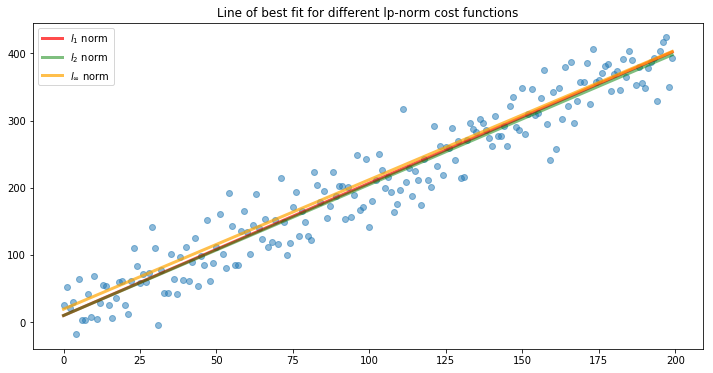

In [4]:
plt.figure(figsize=[12, 6])
plt.scatter(x,y, alpha=0.5)
plt.plot(x, theta_1.value[0] * x + theta_1.value[1] *np.ones(N), 
         color='red', linewidth=3, alpha=0.7, label=r"$l_1$ norm")
Theta2 = np.linalg.inv(X.T@X)@X.T@Y
plt.plot(x, Theta2[0] * x + Theta2[1] *np.ones(N), 
         color='green', linewidth=3, alpha=0.5, label=r"$l_2$ norm")
plt.plot(x, theta_infty.value[0] * x + theta_infty.value[1] *np.ones(N), 
         color='orange', linewidth=3, alpha=0.7, label=r"$l_\infty$ norm")

plt.title("Line of best fit for different lp-norm cost functions")
plt.legend()
plt.show()